In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_pre=pd.read_csv("preprocessing.csv")
data_pre.head(10)

,Gender,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Group,Vintage_Group
0,0,1,2,1,0.099205,0,0,78,24
1,0,2,0,1,0.054321,0,0,34,24
2,0,3,2,1,0.141660,1,0,56,24
3,1,2,0,1,0.043525,0,0,34,2
4,0,2,0,1,0.083823,0,0,34,24
5,1,3,0,1,0.050659,1,0,56,24
6,1,1,2,2,0.100275,1,1,67,2
7,0,3,2,1,0.041034,1,0,45,2
8,0,3,1,1,0.121331,0,0,45,24
9,0,3,1,0,0.192954,0,0,56,46


## Pre-precessing

In [3]:
from sklearn.utils import resample

data_pre_resampled = resample(data_pre[data_pre['Is_Lead']==0], n_samples=data_pre[data_pre['Is_Lead']==1].shape[0])

data_preproc=pd.concat([data_pre_resampled,data_pre[data_pre['Is_Lead']==1]])

data_preproc['Is_Lead'].value_counts()

1    58288
0    58288
Name: Is_Lead, dtype: int64

In [4]:
#droping target-variable for the pre
X=data_preproc.drop('Is_Lead', axis=1)
Y=data_preproc['Is_Lead']

# Splitting to Training and Test
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(X, Y, stratify=Y, test_size=0.6)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((89522, 8), (10142, 8), (89522,), (10142,))

## Training Model and data validation

##### K Nearesr Neighbour

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

# Automating the process of cross validation for different K-Neighbors
def Val_score(n_neighbors):
  '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
  avg = []
  std = []
  
  for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
    score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
    avg.append(score.mean())
    
    # adding standard deviation to std list
    std.append(score.std())
    
    print("Score for K="+str(i)+" is "+str(score.mean()))
    
  return avg, std

In [6]:
# Using this function  
n_neighbors = range(5,50,5)
mean, std = Val_score(n_neighbors)

Score for K=5 is 0.777909311081093
Score for K=10 is 0.7867675232699172
Score for K=15 is 0.792129336280708
Score for K=20 is 0.7915707931410653
Score for K=25 is 0.7926096159798657
Score for K=30 is 0.7923303712356666
Score for K=35 is 0.7924644194930391
Score for K=40 is 0.7915484555079465
Score for K=45 is 0.7920622996749882


Text(0.5, 1.0, 'Mean Validation score')

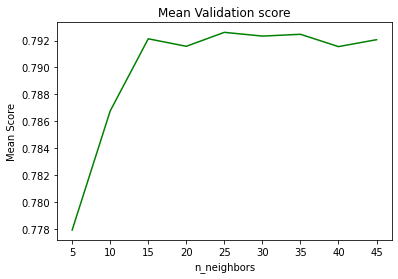

In [7]:
# Ploting Mean Validation Score for each K value
plt.plot(n_neighbors[:], mean[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

In [8]:
# Need to rerun the same Using this function----but lowering the range as score decreases after 20
n_neighbors = range(10,25)
mean, std = Val_score(n_neighbors)

Score for K=10 is 0.7867675232699172
Score for K=11 is 0.7899957373462667
Score for K=12 is 0.7888563758190299
Score for K=13 is 0.7917383597012979
Score for K=14 is 0.7902303567323627
Score for K=15 is 0.792129336280708
Score for K=16 is 0.790788879908752
Score for K=17 is 0.7921628246386876
Score for K=18 is 0.7916936969120939
Score for K=19 is 0.7921181269137898
Score for K=20 is 0.7915707931410653
Score for K=21 is 0.7922074874278915
Score for K=22 is 0.7920287614088747
Score for K=23 is 0.7925649244934848
Score for K=24 is 0.7925984615118951


Text(0.5, 1.0, 'Mean Validation score')

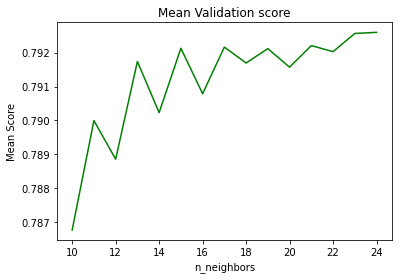

In [9]:
# Ploting Mean Validation Score for each K value
plt.plot(n_neighbors[:], mean[:], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

##### We will settle for 13 neighbours

In [10]:
model=KNN(n_neighbors = 15)
model.fit(train_x,train_y)
pred_prob=model.predict_proba(train_x)
auc_score=roc_auc_score(train_y, pred_prob[:,1])
print("KNN Train = " + str(auc_score))
pred_prob=model.predict_proba(test_x)
auc_score=roc_auc_score(test_y, pred_prob[:,1])
print("KNN test = " + str(auc_score))

KNN Train = 0.8952522075471566
KNN test = 0.8491971294154265


## Test Prediction

In [11]:
test=pd.read_csv("test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [12]:
## Age
test=test.assign(Age_Group = test['Age'].apply(lambda x : 23 if (x>=20 and x<30)
                                               else (34 if (x>=30 and x<40)
                                                     else (45 if (x>=40 and x<50)
                                                           else (56 if (x>=50 and x<60)
                                                                 else (67 if (x>=60 and x<70)
                                                                       else (78 if (x>=70 and x<80)
                                                                             else 80)))))))
# Fill Credit_Product
test['Credit_Product']=test['Credit_Product'].fillna('0')

## Vintage
test=test.assign(Vintage_Group = test['Vintage'].apply(lambda x : 2 if (x>=0 and x<24)
                                               else (24 if (x>=24 and x<48)
                                                     else (46 if (x>=48 and x<72)
                                                           else (68 if (x>=72 and x<96)
                                                                 else (81 if (x>=96 and x<120)
                                                                       else 99))))))

test=test.drop(['Age','Vintage'], axis=1)
test['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
test['Occupation'].replace({'Entrepreneur':0, 'Other':1, 'Salaried':2, 'Self_Employed':3}, inplace=True)
test['Channel_Code'].replace({'X1':0, 'X2':1, 'X3':2, 'X4':3}, inplace=True)
test['Is_Active'].replace({'Yes':1, 'No':0}, inplace=True)
test['Credit_Product'].replace({'Yes':0,'No':1,'0':2},inplace=True)
test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group,Vintage_Group
0,VBENBARO,1,RG254,1,0,0,742366,0,23,24
1,CCMEWNKY,1,RG268,1,1,2,925537,0,45,46
2,VK3KGA9M,1,RG270,2,0,1,215949,0,34,2
3,TT8RPZVC,1,RG272,1,0,1,868070,0,23,24
4,SHQZEYTZ,0,RG270,1,0,1,657087,0,23,2


In [13]:
#Removing ID and region
test_tst=test.drop(['ID','Region_Code'], axis=1)


#scaling Avg_Account_Balance with Standard-Deviation
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
test_tst['Avg_Account_Balance'] = ss.fit_transform(test_tst[['Avg_Account_Balance']])
test_tst.head()

,Gender,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group,Vintage_Group
0,1,1,0,0,0.072805,0,23,24
1,1,1,1,2,0.091333,0,45,46
2,1,2,0,1,0.019558,0,34,2
3,1,1,0,1,0.085520,0,23,24
4,0,1,0,1,0.064179,0,23,2


In [14]:
predicted_val=model.predict(test_tst)
Final=pd.DataFrame({'ID':test['ID'],'Is_Lead':predicted_val})
Final.to_csv('KNN-Final-resampled.csv',index=False)